In [1]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

**Load and Inspect the Data**

In [2]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'BrentOilPrices.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data = data.set_index('Date')
data.head()

C:\Users\Bereket\AppData\Local\Temp\ipykernel_14888\14611219.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


**Check for Missing or Anomalous Values**

In [4]:
print('\nUnique dates in our data: ', len(data.index.unique()), 'Days')
our_date_range = data.index.max() - data.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')
#date_range = pd.date_range(min(data.index), max(data.index))


Unique dates in our data:  9011 Days
Total days in our date range: 12962 Days


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
# Detect outliers (e.g., using quantiles or standard deviation)
print(missing_values)

Price    0
dtype: int64


**Summary Statistics**

* Calculate descriptive statistics to understand the average, median, minimum, and maximum prices over the dataset's timeframe.
Note down any key findings, such as periods of price stability or high volatility.

In [16]:
data['Price'].describe()


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

**Visualize the Time Series Data**

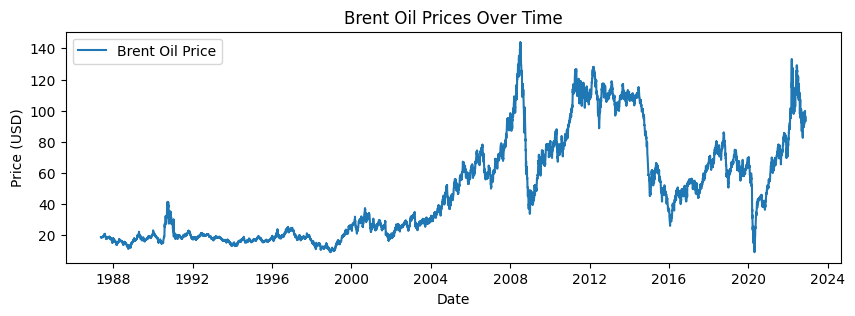

In [6]:
import matplotlib.pyplot as plt
# Plot the data
plt.figure(figsize=(10, 3))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()

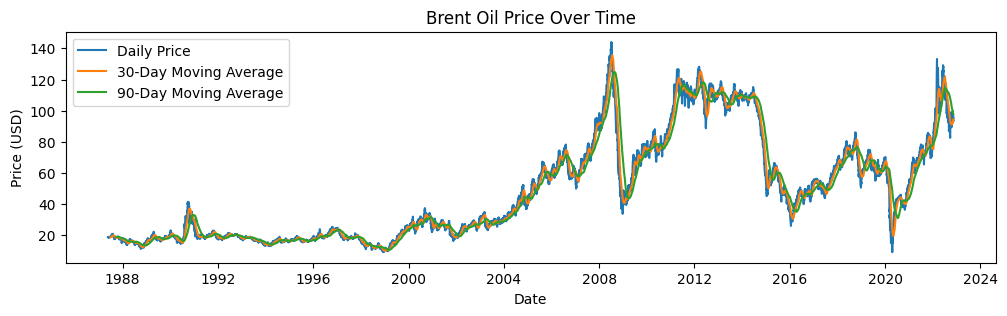

In [7]:
import matplotlib.pyplot as plt

# Plot price trend over time
plt.figure(figsize=(12, 3))
plt.plot(data, label='Daily Price')
plt.plot(data.rolling(window=30).mean(), label='30-Day Moving Average')
plt.plot(data.rolling(window=90).mean(), label='90-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Price Over Time')
plt.legend()
plt.show()


**Seasonality Analysis**

* Decompose the Time Series: seasonal decomposition is used to separate the data into trend, seasonality, and residual components, which can highlight patterns recurring at regular intervals

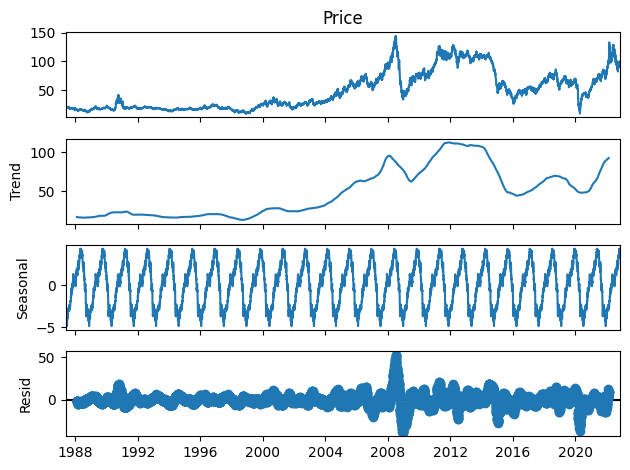

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the date as index for time series analysis
result = seasonal_decompose(data['Price'], model='additive', period=365)
result.plot()
plt.show()


**Assess Volatility** 

* Calculate Daily Returns: Computing the percentage change in price to observe day-to-day volatility.
* Volatility Over Time: Plot rolling standard deviation (e.g., 30-day window) to visualize how price volatility has changed over time.

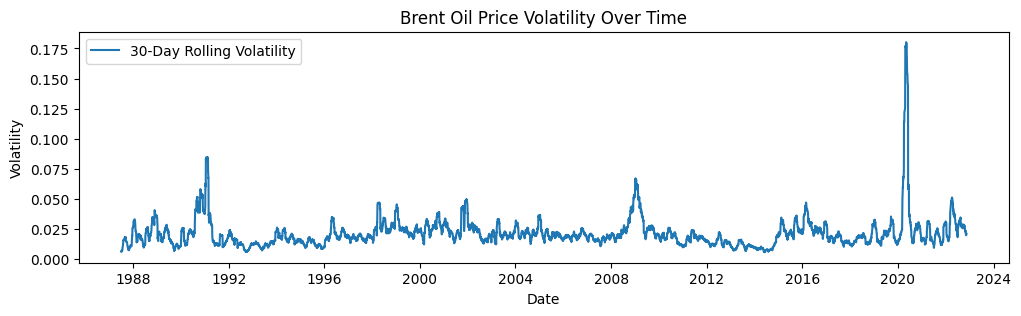

In [9]:
# Calculate daily returns
data['Daily Return'] = data['Price'].pct_change()
# Calculate rolling volatility
data['30-Day Volatility'] = data['Daily Return'].rolling(window=30).std()

# Plot daily returns and volatility
plt.figure(figsize=(12, 3))
plt.plot(data.index, data['30-Day Volatility'], label='30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Brent Oil Price Volatility Over Time')
plt.legend()
plt.show()


**Autocorrelation and Seasonality Checks**

* Autocorrelation Plot: This helps identify any periodicity in the data, suggesting that past values influence future prices at certain lags.
* Partial Autocorrelation: Examine the degree of correlation between the series and its lagged values, controlling for any shorter lags

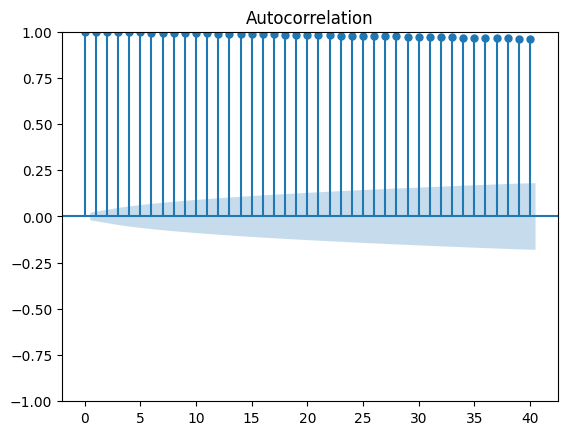

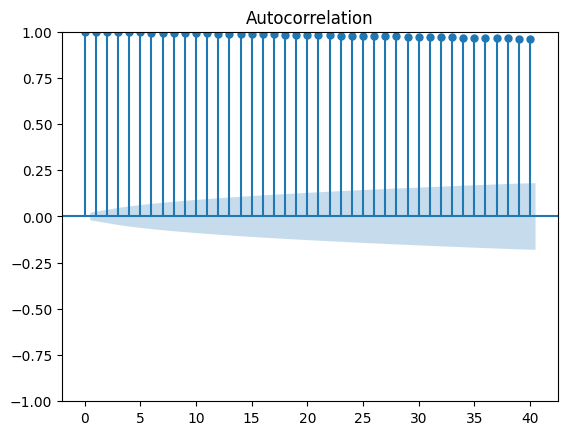

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Price'])

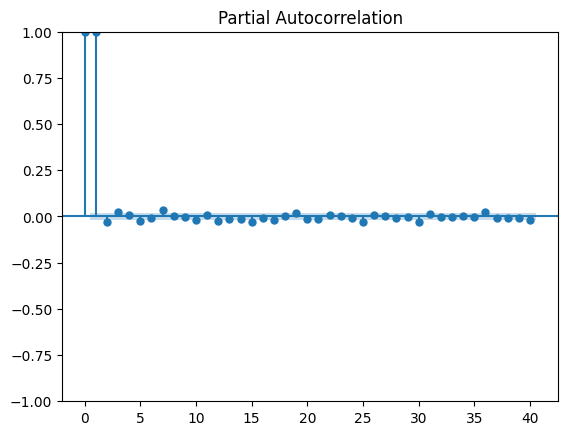

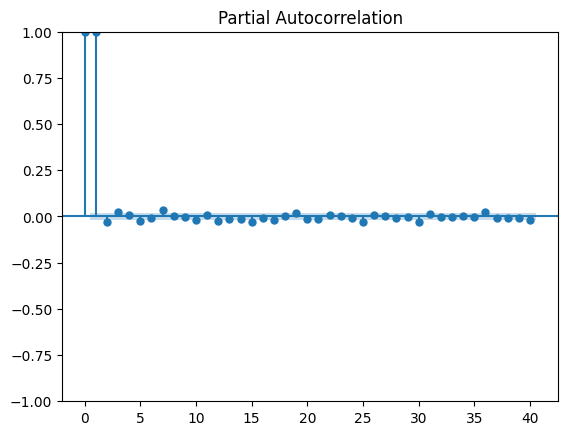

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Price'])

**Compile Key Events List**

In [21]:
data

,Price,Daily Return,30-Day Volatility
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,-0.009662,NaN
1987-05-22,18.55,0.005420,NaN
1987-05-25,18.60,0.002695,NaN
1987-05-26,18.63,0.001613,NaN
...,...,...,...
2022-11-08,96.85,-0.030239,0.019875
2022-11-09,93.05,-0.039236,0.020100
2022-11-10,94.25,0.012896,0.020198
